In [30]:
!pip install pandas matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 16.7 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 4.4 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.1 MB/s eta 0:00:00a 0:00:01


In [28]:
import os
import pandas as pd
from glob import glob

# Get all .length and .score files
length_files = sorted(glob("../data/raw/*.length"))
score_files = sorted(glob("../updated_results/PhyloCSF/*.scores"))

score_files = {i.split('/')[-1].split('_phyloCSF')[0]:i for i in sorted(glob("../updated_results/PhyloCSF/*.scores"))}
a = {i.split('/')[-1].split('.bed12.length')[0]:i for i in sorted(glob("../data/raw/*.length"))}
length_files = {i: a[i] for i in a if i in score_files}

print(length_files)
print(score_files)


{'CTE_new': '../data/raw/CTE_new.bed12.length', 'NTEs': '../data/raw/NTEs.bed12.length', 'NTEs_old': '../data/raw/NTEs_old.bed12.length', 'intergenic_100': '../data/raw/intergenic_100.bed12.length', 'intergenic_50': '../data/raw/intergenic_50.bed12.length', 'leaders': '../data/raw/leaders.bed12.length', 'leaders_old': '../data/raw/leaders_old.bed12.length', 'trailers': '../data/raw/trailers.bed12.length', 'trailers_new': '../data/raw/trailers_new.bed12.length'}
{'CDS_5k': '../updated_results/PhyloCSF/CDS_5k_phyloCSF.bed.scores', 'CTE_new': '../updated_results/PhyloCSF/CTE_new_phyloCSF.bed.scores', 'CTEs': '../updated_results/PhyloCSF/CTEs_phyloCSF.bed.scores', 'NTEs_old': '../updated_results/PhyloCSF/NTEs_old_phyloCSF.bed.scores', 'NTEs': '../updated_results/PhyloCSF/NTEs_phyloCSF.bed.scores', 'intergenic_100': '../updated_results/PhyloCSF/intergenic_100_phyloCSF.bed.scores', 'intergenic_50': '../updated_results/PhyloCSF/intergenic_50_phyloCSF.bed.scores', 'leaders_old': '../updated_re

In [48]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary to store combined data for each key
combined_data = {}

for key in length_files:
    # Read length and score files
    length_df = pd.read_csv(length_files[key], sep=' ', header=None, names=["transcript", "length"])
    score_df = pd.read_csv(score_files[key], sep='\t', header=None, names=["transcript", "score"])
    
    # Convert all 'transcript' values to strings and clean them
    length_df["transcript"] = length_df["transcript"].astype(str).str.replace(r"[._].*", "", regex=True)
    score_df["transcript"] = score_df["transcript"].astype(str).str.replace(r"[._].*", "", regex=True)
    
    # Merge the two DataFrames on the "transcript" column
    merged_df = pd.merge(length_df, score_df, on="transcript")
    
    # Store the merged DataFrame
    combined_data[key] = merged_df


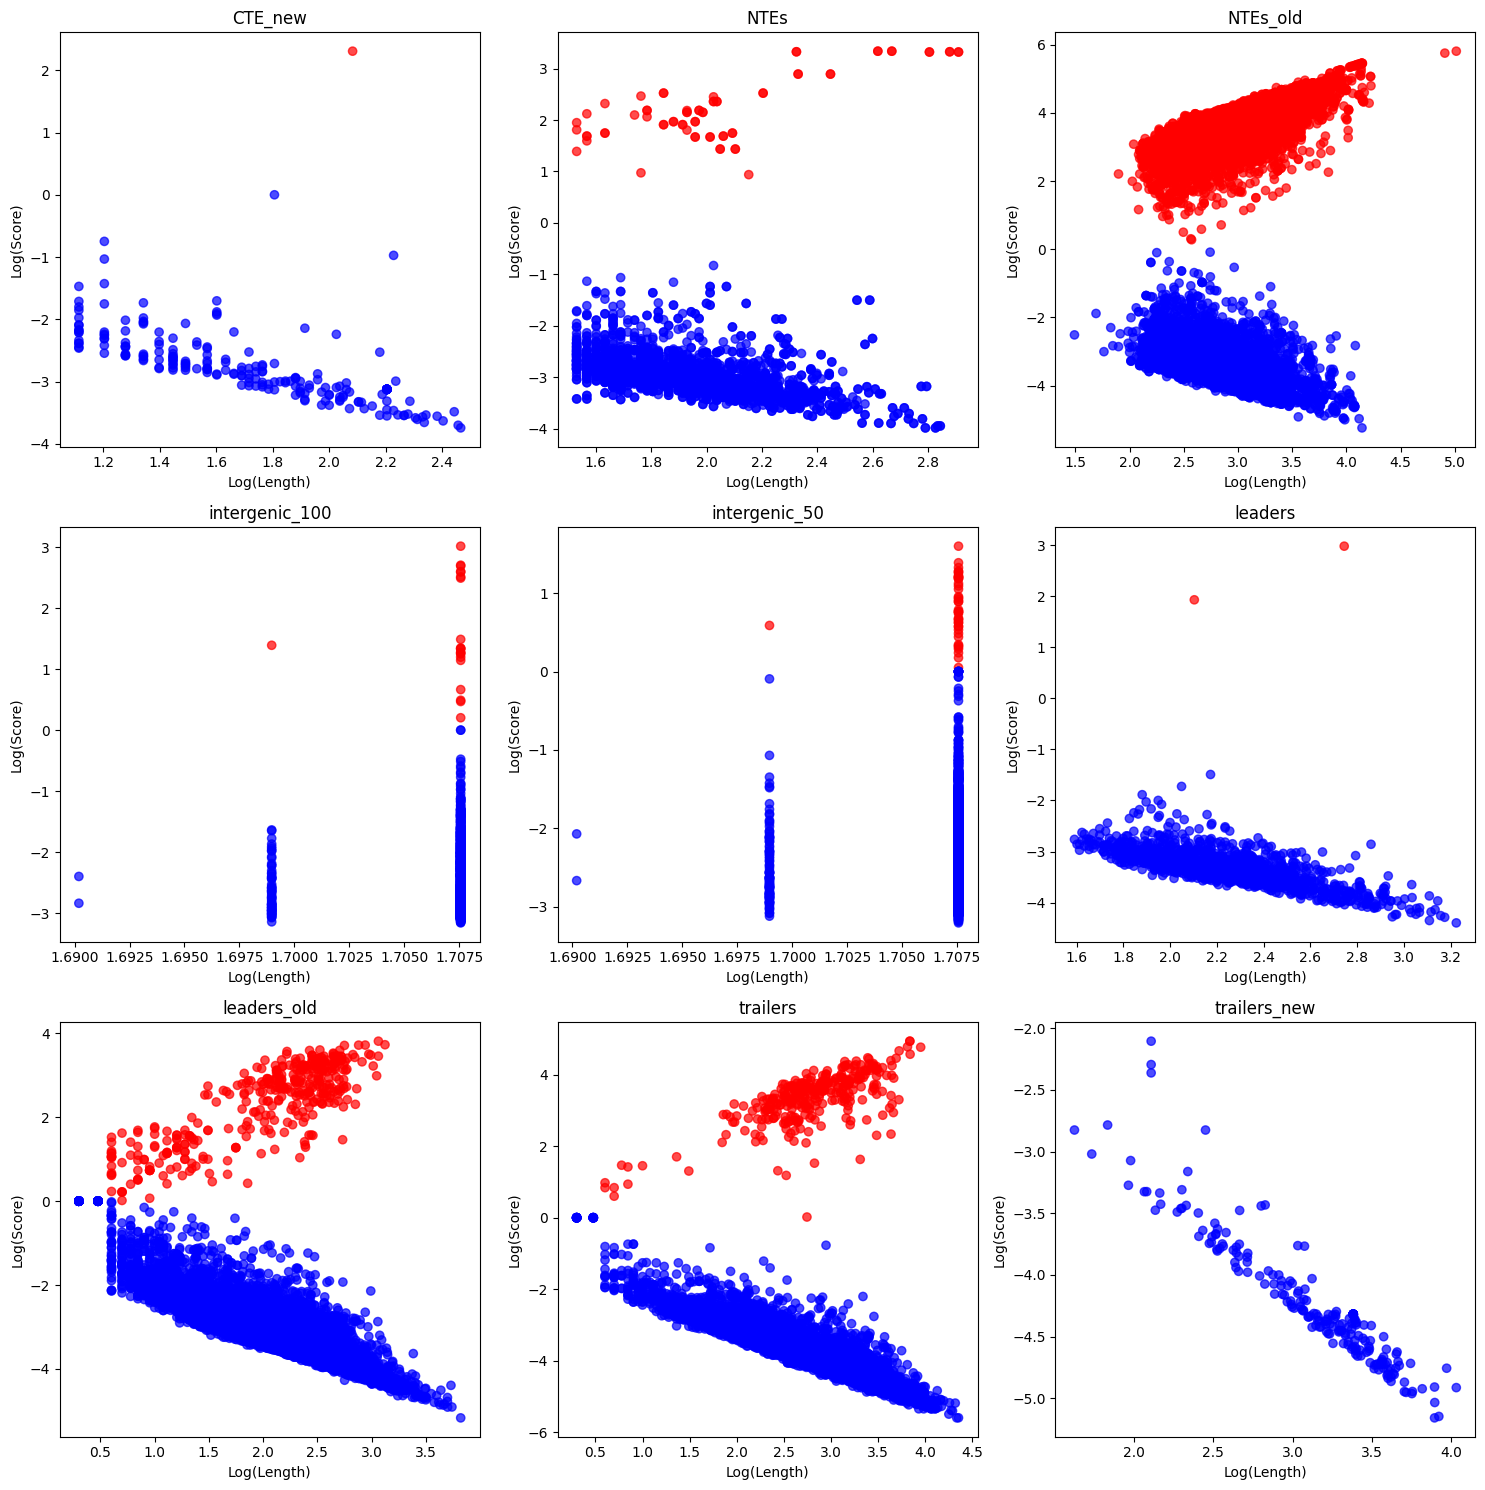

In [51]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Create subplots with a dynamic number of rows
num_plots = len(combined_data)
num_cols = 3  # Number of columns for subplots
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), sharex=False, sharey=False)
axes = axes.flatten()

for i, (key, df) in enumerate(combined_data.items()):
    ax = axes[i]
    
    # Apply log transformation (adding a small constant to avoid log(0))
    df["log_length"] = np.log10(df["length"] + 1)
    df["log_score"] = np.log10(df["score"].abs() + 1) * np.sign(df["score"])  # Keep sign for scores
    
    # Scatter plot with different colors for positive and negative scores
    ax.scatter(
        df["log_length"], 
        df["log_score"], 
        c=["red" if score > 0 else "blue" for score in df["score"]],
        alpha=0.7
    )
    
    ax.set_title(f"{key}")
    ax.set_xlabel("Log(Length)")
    ax.set_ylabel("Log(Score)")

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
